In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Creation of the Climate Liveability Index

In [61]:
from sklearn.preprocessing import MinMaxScaler

# Define the weights for each climate score variable
climate_weights = {
    'annual_mean_temperature': 0.2,
    'mean_precipitation': 0.1,
    'mean_temperature_coldest_quarter': 0.3,
    'mean_temperature_warmest_quarter': 0.3,
    'precipitation_driest_month': 0.05,
    'precipitation_wettest_month': 0.05
}

# Load the data into a pandas dataframe
dfx = pd.read_csv('full_data_top_100_cities_celcius_rcp8.5.csv')

# Normalize the climate score variables using MinMaxScaler
scaler = MinMaxScaler()
dfx[list(climate_weights.keys())] = scaler.fit_transform(dfx[list(climate_weights.keys())])

# Multiply each climate score variable by its corresponding weight
weighted_scores = dfx[list(climate_weights.keys())].multiply(list(climate_weights.values()))

# Sum up the weighted scores to get the weighted index for the climate score
dfx['climate_score_weighted'] = weighted_scores.sum(axis=1)
dfx

,geoname_id,name,country_name_en,population,year,annual_mean_temperature,mean_precipitation,mean_temperature_coldest_quarter,mean_temperature_warmest_quarter,precipitation_driest_month,precipitation_wettest_month,climate_score_weighted
0,2293538,Abidjan,Côte d'Ivoire,6321017,1950,0.722341,0.330957,0.853820,0.428577,0.220953,0.276649,0.587163
1,2293538,Abidjan,Côte d'Ivoire,6321017,1951,0.710907,0.310647,0.838734,0.428898,0.255148,0.279607,0.580274
2,2293538,Abidjan,Côte d'Ivoire,6321017,1952,0.703041,0.301434,0.834153,0.423763,0.374015,0.233391,0.578497
3,2293538,Abidjan,Côte d'Ivoire,6321017,1953,0.711239,0.341375,0.843217,0.418688,0.354335,0.270669,0.586207
4,2293538,Abidjan,Côte d'Ivoire,6321017,1954,0.710295,0.292661,0.830076,0.432797,0.222681,0.212550,0.571949
...,...,...,...,...,...,...,...,...,...,...,...,...
15095,1785286,Zibo,China,3129228,2096,0.524703,0.204563,0.492881,0.577216,0.017195,0.220168,0.458294
15096,1785286,Zibo,China,3129228,2097,0.525278,0.220832,0.478616,0.571408,0.024552,0.234245,0.455086
15097,1785286,Zibo,China,3129228,2098,0.538732,0.138690,0.480240,0.612645,0.019394,0.175705,0.459236
15098,1785286,Zibo,China,3129228,2099,0.575954,0.187413,0.521801,0.589149,0.022990,0.199674,0.478350


In [62]:
df['climate_liveability_index']=dfx['climate_score_weighted']
df

,geoname_id,name,country_name_en,population,year,annual_mean_temperature,mean_precipitation,mean_temperature_coldest_quarter,mean_temperature_warmest_quarter,precipitation_driest_month,precipitation_wettest_month,climate_liveability_index
0,2293538,Abidjan,Côte d'Ivoire,6321017,1950,25.82852,4.787519e-08,24.37543,26.75824,1.281499e-08,1.292456e-07,0.587163
1,2293538,Abidjan,Côte d'Ivoire,6321017,1951,25.45282,4.493731e-08,23.61664,26.76868,1.479828e-08,1.306273e-07,0.580274
2,2293538,Abidjan,Côte d'Ivoire,6321017,1952,25.19434,4.360455e-08,23.38623,26.60165,2.169243e-08,1.090361e-07,0.578497
3,2293538,Abidjan,Côte d'Ivoire,6321017,1953,25.46370,4.938228e-08,23.84213,26.43660,2.055098e-08,1.264517e-07,0.586207
4,2293538,Abidjan,Côte d'Ivoire,6321017,1954,25.43268,4.233543e-08,23.18115,26.89550,1.291521e-08,9.929957e-08,0.571949
...,...,...,...,...,...,...,...,...,...,...,...,...
15095,1785286,Zibo,China,3129228,2096,19.33408,2.959145e-08,6.22067,31.59270,9.972821e-10,1.028588e-07,0.458294
15096,1785286,Zibo,China,3129228,2097,19.35297,3.194488e-08,5.50317,31.40380,1.423966e-09,1.094351e-07,0.455086
15097,1785286,Zibo,China,3129228,2098,19.79507,2.006248e-08,5.58484,32.74503,1.124846e-09,8.208615e-08,0.459236
15098,1785286,Zibo,China,3129228,2099,21.01820,2.711054e-08,7.67532,31.98083,1.333397e-09,9.328426e-08,0.478350


In [63]:
df.to_csv('full_data_top_100_cities_celcius_rcp8.5_with_index.csv', index=None)

# Visualisation

In [3]:
df=pd.read_csv('full_data_top_100_cities_celcius_rcp8.5_with_index.csv')

In [4]:
df.head()

,geoname_id,name,country_name_en,population,year,annual_mean_temperature,mean_precipitation,mean_temperature_coldest_quarter,mean_temperature_warmest_quarter,precipitation_driest_month,precipitation_wettest_month,climate_liveability_index
0,2293538,Abidjan,Côte d'Ivoire,6321017,1950,25.82852,4.787519e-08,24.37543,26.75824,1.281499e-08,1.292456e-07,0.587163
1,2293538,Abidjan,Côte d'Ivoire,6321017,1951,25.45282,4.493731e-08,23.61664,26.76868,1.479828e-08,1.306273e-07,0.580274
2,2293538,Abidjan,Côte d'Ivoire,6321017,1952,25.19434,4.360455e-08,23.38623,26.60165,2.169243e-08,1.090361e-07,0.578497
3,2293538,Abidjan,Côte d'Ivoire,6321017,1953,25.46370,4.938228e-08,23.84213,26.43660,2.055098e-08,1.264517e-07,0.586207
4,2293538,Abidjan,Côte d'Ivoire,6321017,1954,25.43268,4.233543e-08,23.18115,26.89550,1.291521e-08,9.929957e-08,0.571949


<AxesSubplot:xlabel='annual_mean_temperature', ylabel='mean_precipitation'>

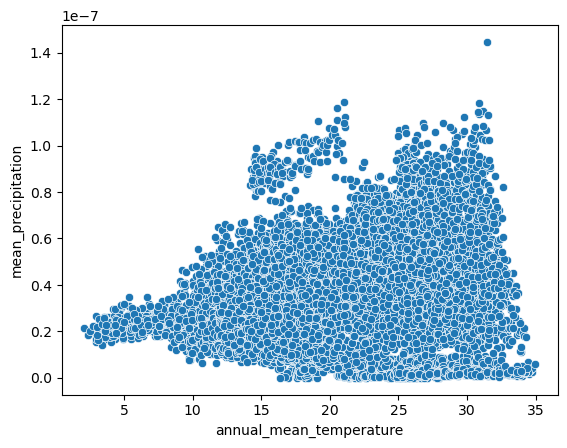

In [54]:
sns.scatterplot(x=df.annual_mean_temperature,y=df.mean_precipitation)

<AxesSubplot:xlabel='annual_mean_temperature', ylabel='Density'>

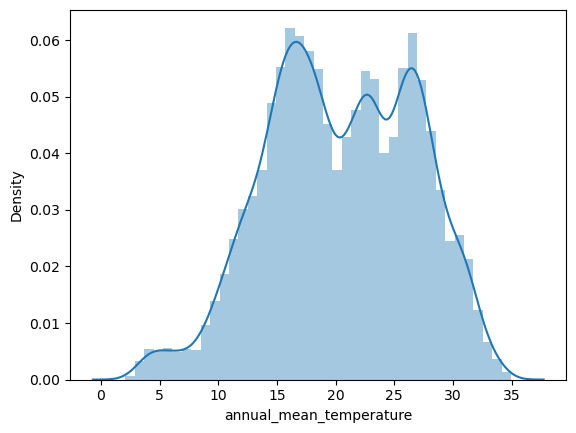

In [57]:
sns.distplot(df.annual_mean_temperature)

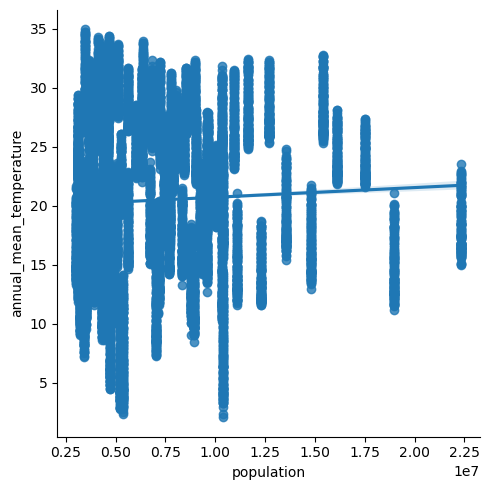

In [69]:
sns.lmplot(x='population', y='annual_mean_temperature', data=df)

plt.show()

In [19]:
sns.lmplot(x='year', y='annual_mean_temperature', hue='name', data=df)

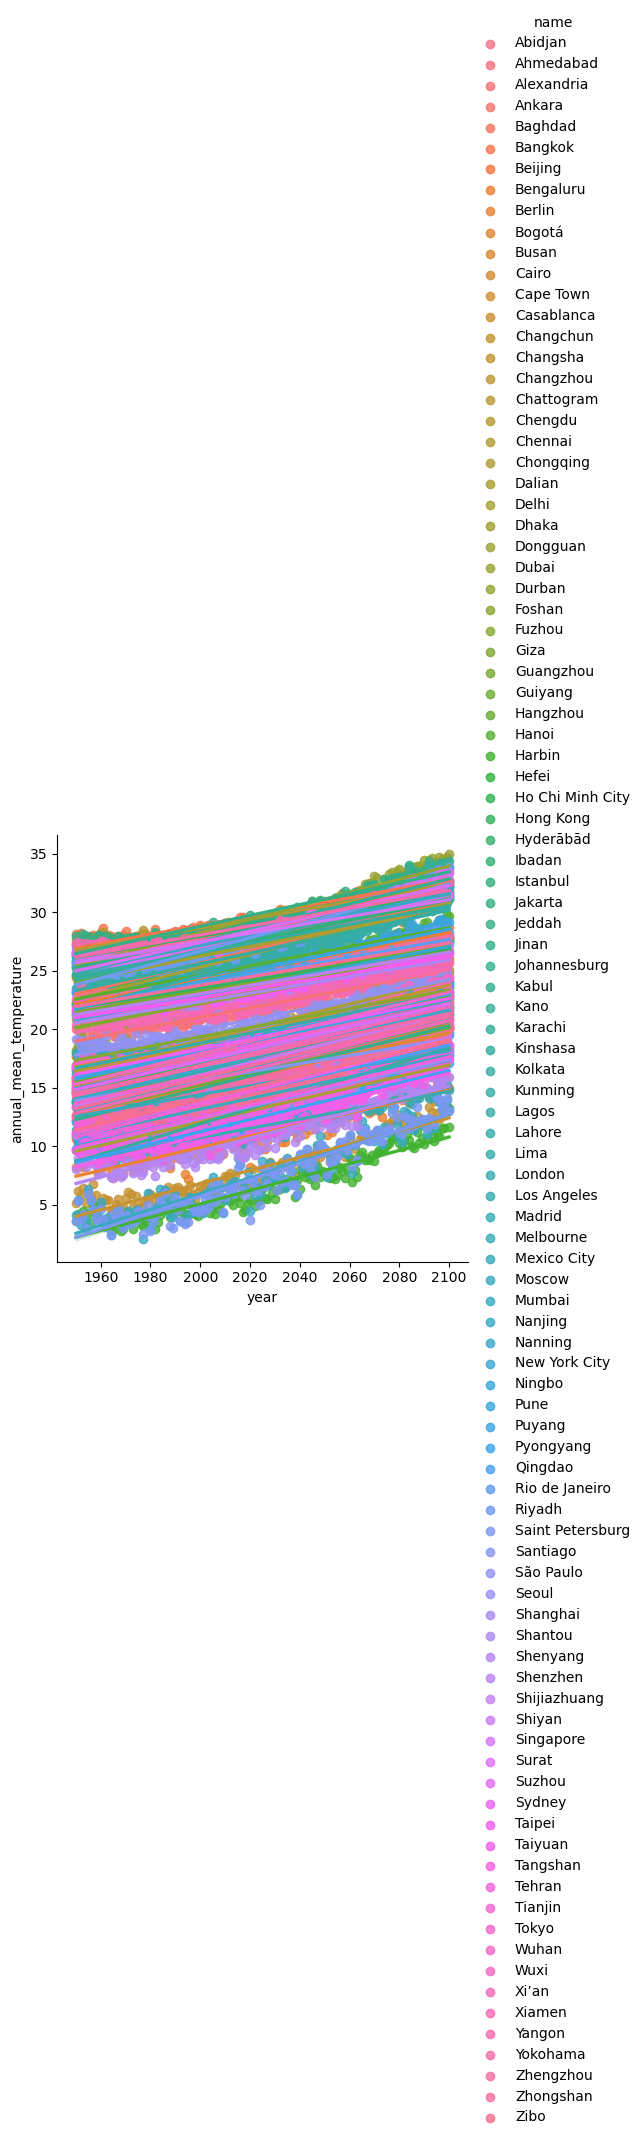

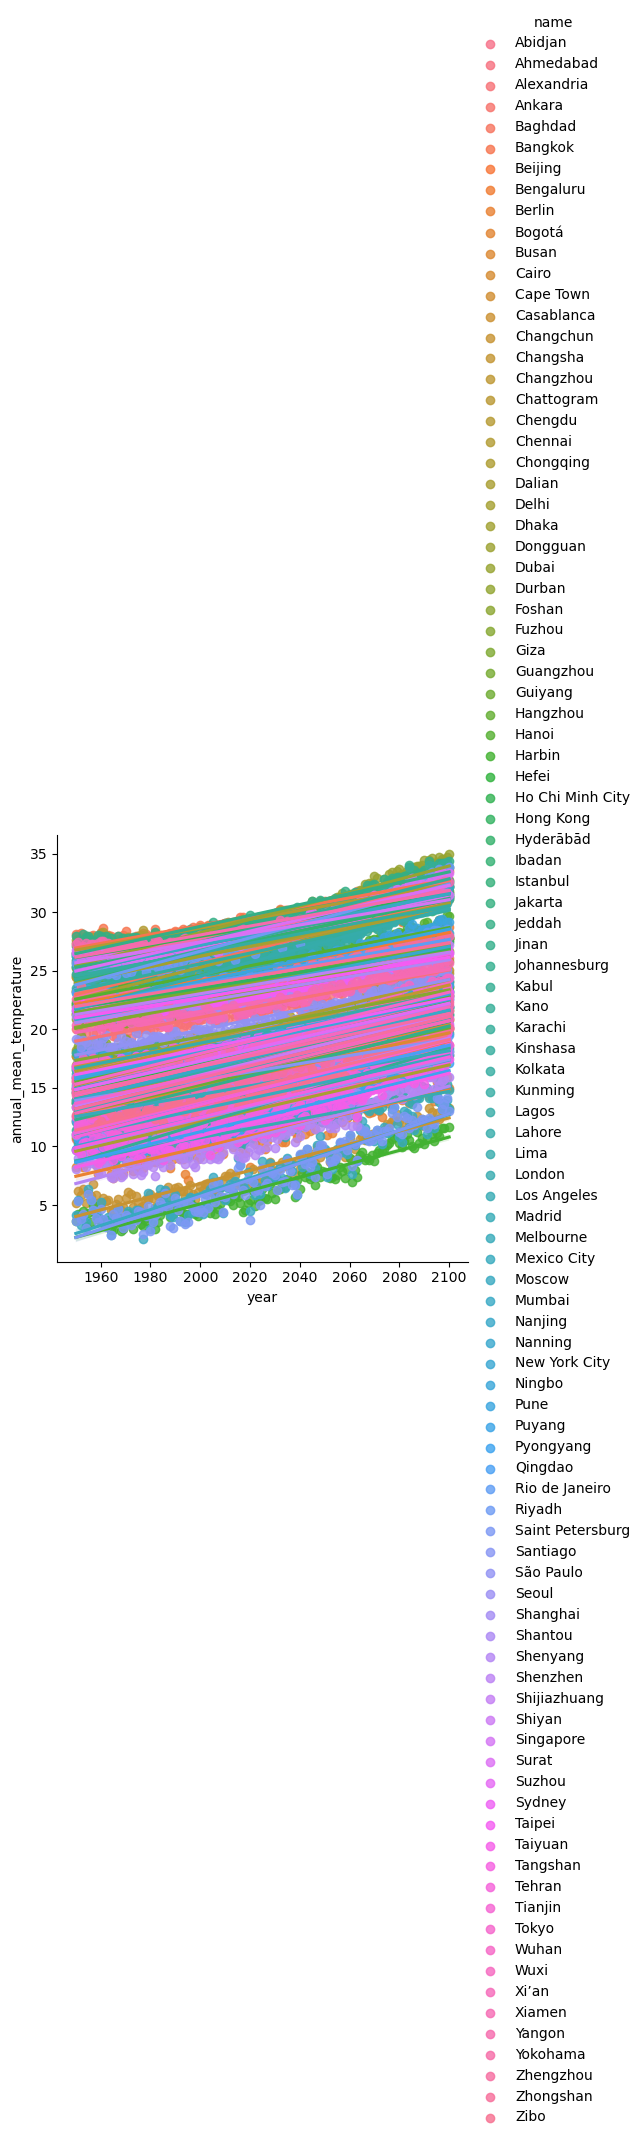

In [21]:
plt.show()

In [66]:
df.columns

Index(['geoname_id', 'name', 'country_name_en', 'population', 'year',
       'annual_mean_temperature', 'mean_precipitation',
       'mean_temperature_coldest_quarter', 'mean_temperature_warmest_quarter',
       'precipitation_driest_month', 'precipitation_wettest_month',
       'climate_liveability_index'],
      dtype='object')

In [13]:
df.dtypes

geoname_id                            int64
name                                 object
country_name_en                      object
population                            int64
year                                  int64
annual_mean_temperature             float64
mean_precipitation                  float64
mean_temperature_coldest_quarter    float64
mean_temperature_warmest_quarter    float64
precipitation_driest_month          float64
precipitation_wettest_month         float64
climate_liveability_index           float64
dtype: object

In [14]:
df['annual_mean_temperature']

20.47044018543045

In [23]:
def create_sns_heatmap(data):
    #need to import matplotlib.pyplot as plt
    
    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(data, dtype=bool))
    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))
    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(230, 20, as_cmap=True)
    sns.heatmap(data,mask=mask, cmap=cmap, annot=True,vmin=-0.5, vmax=0.5)
    return f,ax

corr=df.corr()


create_sns_heatmap(corr)

plt.show()

(<Figure size 1100x900 with 2 Axes>, <AxesSubplot:>)

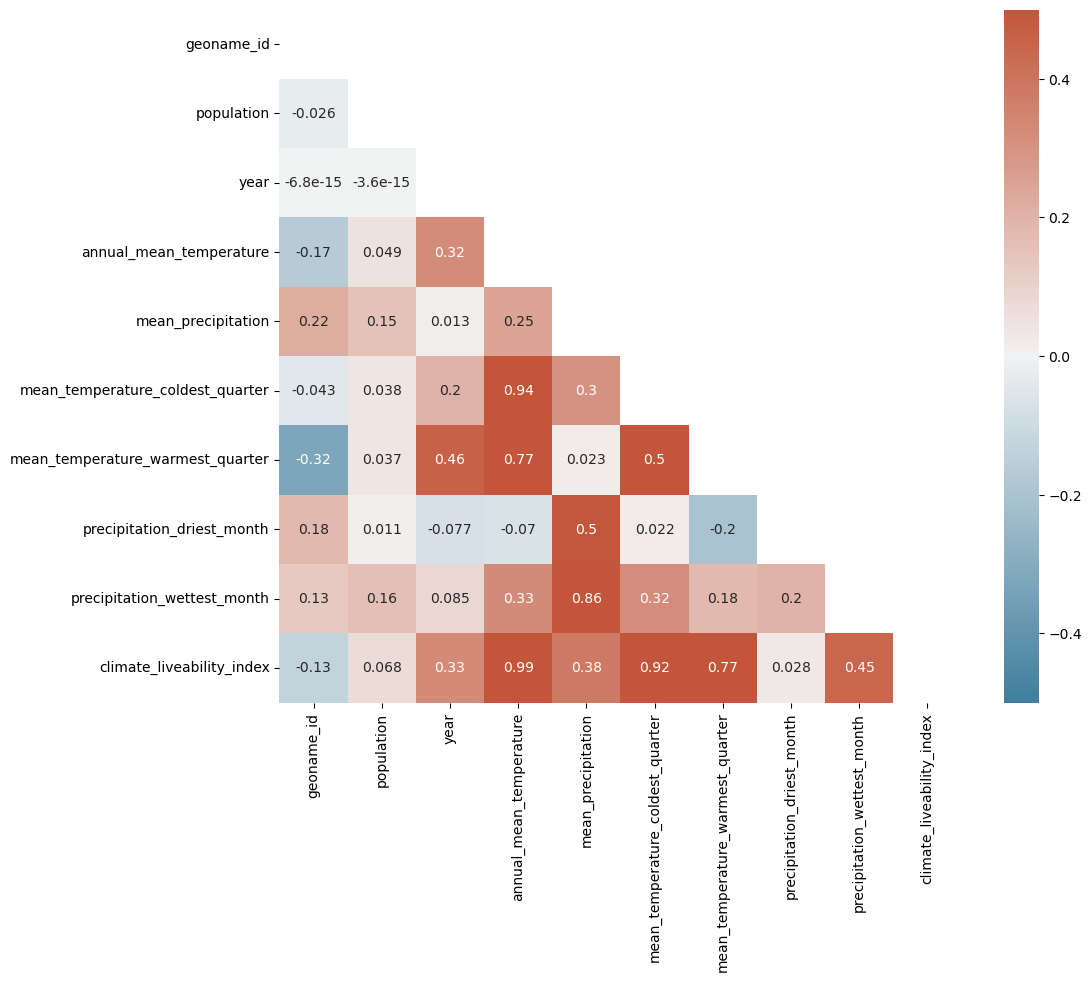

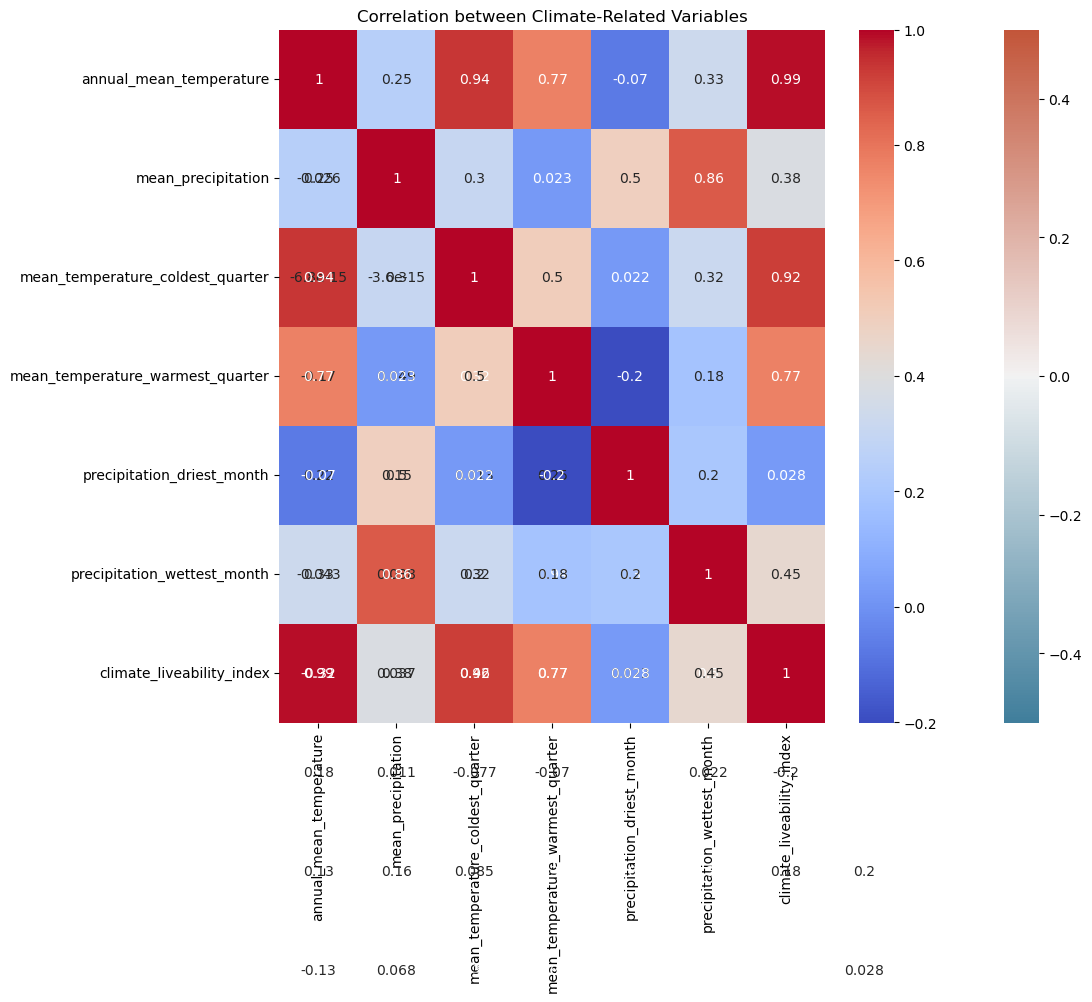

In [25]:
# Heatmap to visualize the correlation between climate-related variables

corr_matrix = df[['annual_mean_temperature', 'mean_precipitation', 'mean_temperature_coldest_quarter',
                  'mean_temperature_warmest_quarter', 'precipitation_driest_month', 'precipitation_wettest_month',
                  'climate_liveability_index']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation between Climate-Related Variables')
plt.show()

In [33]:
df.columns

Index(['geoname_id', 'name', 'country_name_en', 'population', 'year',
       'annual_mean_temperature', 'mean_precipitation',
       'mean_temperature_coldest_quarter', 'mean_temperature_warmest_quarter',
       'precipitation_driest_month', 'precipitation_wettest_month',
       'climate_liveability_index'],
      dtype='object')

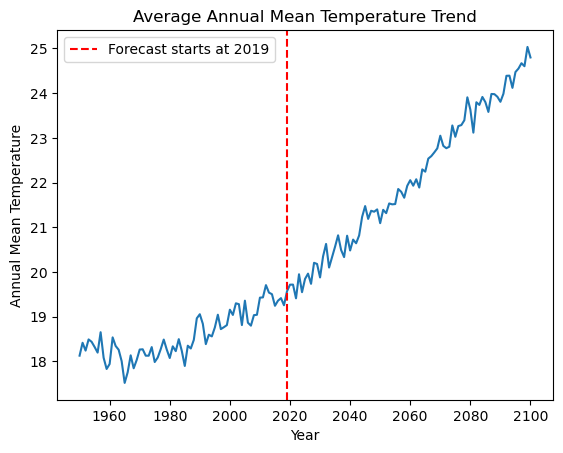

In [37]:
# average annual mean temperature for all cities
avg_temp = df.groupby('year')['annual_mean_temperature'].mean().reset_index()

# create a line plot of average annual mean temperature over time
sns.lineplot(x='year', y='annual_mean_temperature', data=avg_temp)
plt.title('Average Annual Mean Temperature Trend')
plt.xlabel('Year')
plt.ylabel('Annual Mean Temperature')

# add a vertical reference line for 2018
plt.axvline(x=2019, color='r', linestyle='--', label='Forecast starts at 2019')
plt.legend()

plt.show()

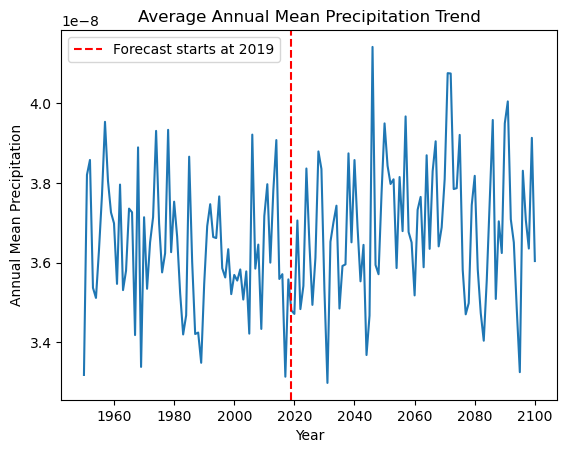

In [38]:
# Average mean precipitation for all cities
avg_temp = df.groupby('year')['mean_precipitation'].mean().reset_index()

# create a line plot of average annual mean temperature over time
sns.lineplot(x='year', y='mean_precipitation', data=avg_temp)
plt.title('Average Annual Mean Precipitation Trend')
plt.xlabel('Year')
plt.ylabel('Annual Mean Precipitation')

# add a vertical reference line for 2018
plt.axvline(x=2019, color='r', linestyle='--', label='Forecast starts at 2019')
plt.legend()

plt.show()

In [ ]:
==> extreme heat episodes on the rise 

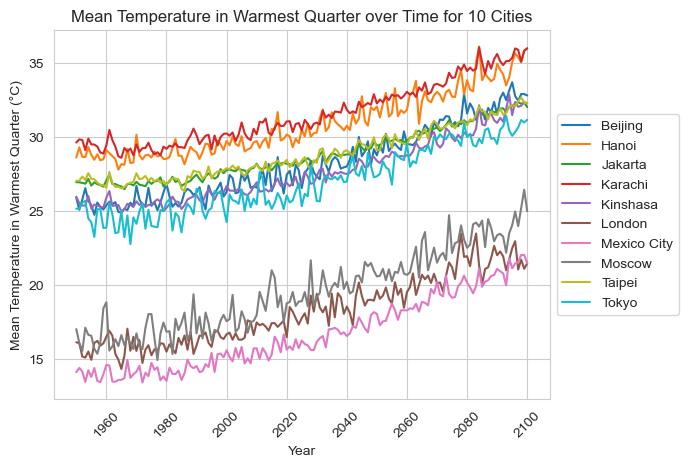

In [177]:
# select the top 10 cities by population, from distinct countries
top_cities = df.drop_duplicates(subset='country_name_en').nlargest(10, 'population')

# filter the DataFrame to only include records for those top 10 cities
top_cities_data = df[df['name'].isin(top_cities['name'])]

# defining colors

colors = ['#c7e9b4', '#7fcdbb', '#41b6c4', '#1d91c0', '#225ea8','#253494', '#081d58', '#a6bddb', '#3690c0', '#034e7b']

city_colors = dict(zip(top_cities_data['name'].unique(), colors))

# create a line chart of mean temperature in the warmest quarter over time for the top 10 cities
ax = sns.lineplot(x='year', y='mean_temperature_warmest_quarter', hue='name', data=top_cities_data, color=city_colors[city])
plt.title('Mean Temperature in Warmest Quarter over Time for 10 Cities')
plt.xlabel('Year')
plt.ylabel('Mean Temperature in Warmest Quarter (°C)')
plt.xticks(rotation=45)

# adjust the position of the legend
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()


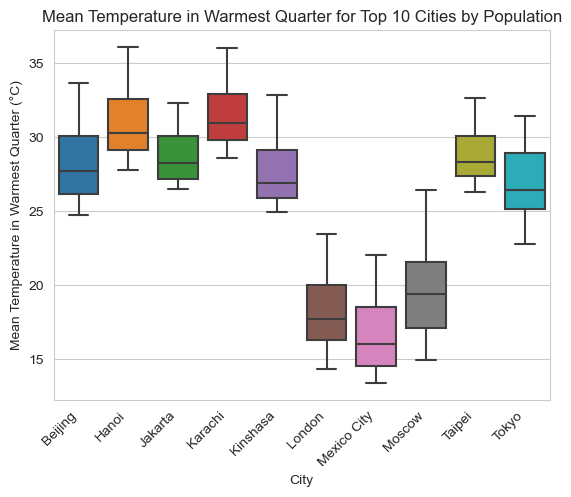

In [178]:
# Top 10 cities by population, from distinct countries
top_cities = df.drop_duplicates(subset='country_name_en').nlargest(10, 'population')

colors = ['#c7e9b4', '#7fcdbb', '#41b6c4', '#1d91c0', '#225ea8',
          '#253494', '#081d58', '#a6bddb', '#3690c0', '#034e7b']

city_colors = dict(zip(top_cities['name'].unique(), colors))

# Box plot of mean temperature in the warmest quarter for the top 10 cities over all years
sns.boxplot(x='name', y='mean_temperature_warmest_quarter', data=df[df['name'].isin(top_cities['name'])])
plt.title('Mean Temperature in Warmest Quarter for Top 10 Cities by Population')
plt.xlabel('City')
plt.ylabel('Mean Temperature in Warmest Quarter (°C)')
plt.xticks(rotation=45, ha='right')

plt.show()


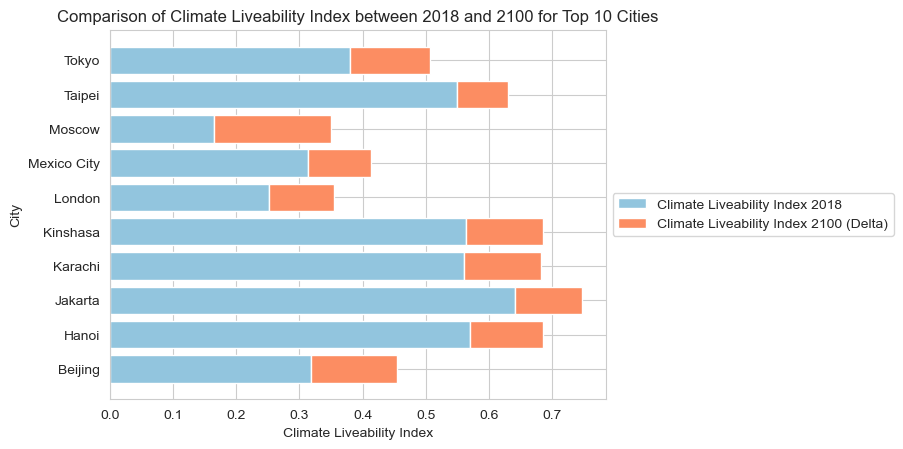

In [134]:
top_cities = df.drop_duplicates(subset='country_name_en').nlargest(10, 'population')
df_top_10 = df[df['geoname_id'].isin(top_cities['geoname_id'])]

# filter data to include only the years 2018 and 2100
df_top_10_filtered = df_top_10[df_top_10['year'].isin([2018, 2100])]

# pivot the table to have separate columns for 2018 and 2100 index values
df_top_10_pivot = df_top_10_filtered.pivot(index='name', columns='year', values='climate_liveability_index')

# reset the index and rename the columns
df_top_10_pivot = df_top_10_pivot.reset_index().rename(columns={2018: 'Index 2018', 2100: 'Index 2100'})
df_top_10_pivot['Delta 2100']=df_top_10_pivot["Index 2100"]-df_top_10_pivot["Index 2018"]


plt.barh(df_top_10_pivot.name, df_top_10_pivot["Index 2018"], label="Climate Liveability Index 2018", color='#92c5de')
plt.barh(df_top_10_pivot.name, df_top_10_pivot["Delta 2100"], left=df_top_10_pivot["Index 2018"], label="Climate Liveability Index 2100 (Delta)", color="#fc8d62")

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xlabel('Climate Liveability Index')
plt.ylabel('City')
plt.title('Comparison of Climate Liveability Index between 2018 and 2100 for Top 10 Cities')

plt.show()
